In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, accuracy_score
import sklearn.metrics as metrics
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [3]:
path='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillUp/labs/ML-FinalAssignment/Weather_Data.csv'

In [4]:
#await download(path, "Weather_Data.csv")
filename ="Weather_Data.csv"

In [5]:
df = pd.read_csv("Weather_Data.csv")

In [6]:
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,W,41,S,SSW,...,92,84,1017.6,1017.4,8,8,20.7,20.9,Yes,Yes
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,W,41,W,E,...,83,73,1017.9,1016.4,7,7,22.4,24.8,Yes,Yes
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,W,41,ESE,ESE,...,88,86,1016.7,1015.6,7,8,23.5,23.0,Yes,Yes
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,W,41,NNE,E,...,83,90,1014.2,1011.8,8,8,21.4,20.9,Yes,Yes
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,W,41,NNE,W,...,88,74,1008.3,1004.8,8,8,22.5,25.5,Yes,Yes


## Lets process the data

#### First, we need to perform one hot encoding to convert categorical variables to binary variables.

In [7]:
df_sydney_processed = pd.get_dummies(data=df, columns=['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])

In [8]:
df_sydney_processed.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,41,17,20,92,...,False,False,False,False,False,True,False,False,False,False
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,41,9,13,83,...,False,False,False,False,False,False,False,False,False,False
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,41,17,2,88,...,False,False,False,False,False,False,False,False,False,False
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,41,22,20,83,...,False,False,False,False,False,False,False,False,False,False
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,41,11,6,88,...,False,False,False,False,False,False,False,True,False,False


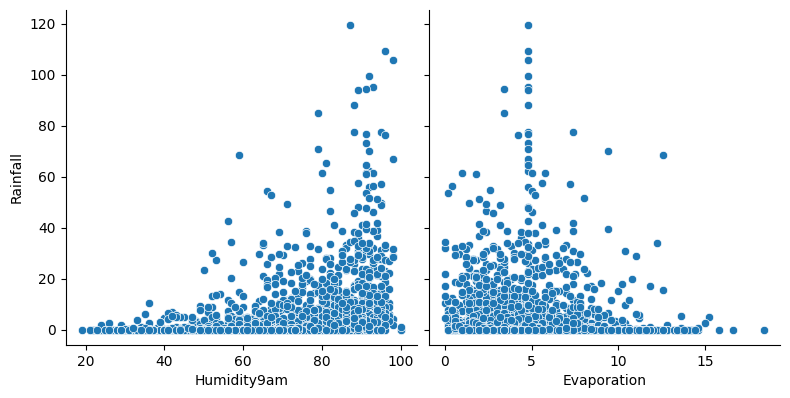

In [9]:
sns.pairplot(df, x_vars=['Humidity9am', 'Evaporation'], y_vars='Rainfall', height=4, aspect=1, kind='scatter')
plt.show()

#### Next, we replace the values of the 'RainTomorrow' column changing them from a categorical column to a binary column. We do not use the `get_dummies` method because we would end up with two columns for 'RainTomorrow' and we do not want, since 'RainTomorrow' is our target.

In [10]:
df_sydney_processed.replace(['No', 'Yes'], [0,1], inplace=True)

C:\Users\Admin.DESKTOP-QVO174E\AppData\Local\Temp\ipykernel_9744\288546165.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_sydney_processed.replace(['No', 'Yes'], [0,1], inplace=True)


### Training Data and Test Data

#### Now, we set our 'features' or x values and our Y or target variable.

In [11]:
df_sydney_processed.drop('Date',axis=1,inplace=True)

In [12]:
df_sydney_processed = df_sydney_processed.astype(float)

In [13]:
features = df_sydney_processed.drop(columns='RainTomorrow', axis=1)

In [14]:
Y = df_sydney_processed['RainTomorrow']

In [15]:
features.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,19.5,22.4,15.6,6.2,0.0,41.0,17.0,20.0,92.0,84.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,19.5,25.6,6.0,3.4,2.7,41.0,9.0,13.0,83.0,73.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,21.6,24.5,6.6,2.4,0.1,41.0,17.0,2.0,88.0,86.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20.2,22.8,18.8,2.2,0.0,41.0,22.0,20.0,83.0,90.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,19.7,25.7,77.4,4.8,0.0,41.0,11.0,6.0,88.0,74.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Linear Regression

### Use the `train_test_split` function to split the `features` and `Y` dataframes with a `test_size` of `0.2` and the `random_state` set to `10`.

In [16]:
x_train, x_test, y_train, y_test =  train_test_split(features,Y , random_state=10,test_size=0.2, shuffle=True)

#### Q2) Create and train a Linear Regression model called LinearReg using the training data (`x_train`, `y_train`).

In [17]:
LinearReg =  LinearRegression().fit(x_train, y_train)


In [18]:
#Printing the model coefficients
#print('Intercept: ',LinearReg.intercept_)
# pair the feature names with the coefficients
#list(zip(features, LinearReg.coef_))

#### Q3) Now use the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.

In [19]:
predictions = LinearReg.predict(x_test) 

In [20]:
#print("Prediction for test set: {}".format(predictions))

In [21]:
LinearReg_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': predictions})
LinearReg_diff

,Actual value,Predicted value
3066,0.0,0.131838
2456,0.0,0.276185
1629,1.0,0.978189
838,1.0,0.287457
2506,0.0,0.132414
...,...,...
2632,1.0,0.264843
1725,0.0,0.175158
1158,1.0,0.706317
1661,0.0,0.173841


#### Q4) Using the `predictions` and the `y_test` dataframe calculate the value for each metric using the appropriate function.

In [22]:
LinearRegression_MAE = metrics.mean_absolute_error(y_test, predictions)
LinearRegression_MSE = metrics.mean_squared_error(y_test, predictions)
LinearRegression_R2 = np.sqrt(metrics.mean_squared_error(y_test, predictions))

#### Q5) Show the MAE, MSE, and R2 in a tabular format using data frame for the linear model.

In [23]:
Report =  pd.DataFrame({
    'Metric': ['Mean Absolute Error (MAE)', 'Mean Squared Error (MSE)', 'R-squared (R²)'],
    'Value': [LinearRegression_MAE, LinearRegression_MSE, LinearRegression_R2]
})
Report

,Metric,Value
0,Mean Absolute Error (MAE),0.256318
1,Mean Squared Error (MSE),0.115721
2,R-squared (R²),0.340177


### KNN

#### Q6) Create and train a KNN model called KNN using the training data (`x_train`, `y_train`) with the `n_neighbors` parameter set to `4`.

In [24]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train, y_train)
neigh
prediction = neigh.predict(x_test)


C:\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


#### Q8) Using the `predictions` and the `y_test` dataframe calculate the value for each metric using the appropriate function.

In [25]:
KNN_Accuracy_Score = metrics.accuracy_score(y_test, prediction)
KNN_Accuracy_Score

0.8183206106870229

In [26]:
KNN_JaccardIndex = jaccard_score(y_test, prediction)
KNN_JaccardIndex

0.4251207729468599

In [27]:
KNN_F1_Score = f1_score(y_test, prediction, average=None)
KNN_F1_Score

array([0.88275862, 0.59661017])

### Decision Tree

In [28]:
print('Shape of X training set {}'.format(x_train.shape),'&',' Size of Y training set {}'.format(y_train.shape))

Shape of X training set (2616, 66) &  Size of Y training set (2616,)


In [29]:
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [30]:
Tree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [31]:
 predictions = Tree.predict(x_test)

In [32]:
#print (PredTree [0:5])
print (y_test [0:5])

3066    0.0
2456    0.0
1629    1.0
838     1.0
2506    0.0
Name: RainTomorrow, dtype: float64


In [33]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test,predictions))

DecisionTrees's Accuracy:  0.8183206106870229


#### Q11) Using the `predictions` and the `y_test` dataframe calculate the value for each metric using the appropriate function.

In [34]:
SVM_Accuracy_Score = metrics.accuracy_score(y_test, predictions)
SVM_JaccardIndex = metrics.jaccard_score(y_test, predictions)
SVM_F1_Score = metrics.f1_score(y_test, predictions)
SVM_Log_Loss = metrics.log_loss(y_test, predictions)
print("SVM accuracy score : ", SVM_Accuracy_Score)
print("SVM jaccardIndex : ", SVM_JaccardIndex)
print("SVM F1_score : ", SVM_F1_Score)
print("SVM Log Loss : ", SVM_Log_Loss)


SVM accuracy score :  0.8183206106870229
SVM jaccardIndex :  0.48034934497816595
SVM F1_score :  0.6489675516224189
SVM Log Loss :  6.548388936343421


### Logistic Regression

#### Q12) Use the `train_test_split` function to split the `features` and `Y` dataframes with a `test_size` of `0.2` and the `random_state` set to `1`.


In [35]:
x_train, x_test, y_train, y_test = train_test_split( features, Y, test_size=0.2, random_state=4)

#### Q13) Create and train a LogisticRegression model called LR using the training data (`x_train`, `y_train`) with the `solver` parameter set to `liblinear`.

In [36]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(x_train,y_train)


#### Q14) Now, use the `predict` and `predict_proba` methods on the testing data (`x_test`) and save it as 2 arrays `predictions` and `predict_proba`.

In [37]:
predictions = LR.predict(x_test)
predictions

array([0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 1., 0., 0.

In [38]:
predict_proba = LR.predict_proba(x_test)
predict_proba 

array([[0.96080786, 0.03919214],
       [0.67940352, 0.32059648],
       [0.68420336, 0.31579664],
       ...,
       [0.428289  , 0.571711  ],
       [0.72118024, 0.27881976],
       [0.93826711, 0.06173289]])

#### Q15) Using the `predictions`, `predict_proba` and the `y_test` dataframe calculate the value for each metric using the appropriate function.

In [39]:
LR_Accuracy_Score = accuracy_score(y_test, predictions)
LR_Accuracy_Score
LR_JaccardIndex = jaccard_score(y_test, yhat,pos_label=0)
LR_F1_Score = f1_score(y_test, predictions, average=None)
LR_Log_Loss = log_loss(y_true, predictions,*, normalize=True, sample_weight=None, labels=None)

SyntaxError: invalid syntax (2798010152.py, line 5)

### SVM

#### Q16) Create and train a SVM model called SVM using the training data (`x_train`, `y_train`).

In [50]:
SVM = svm.SVC(kernel='linear')
SVM.fit(x_train, y_train) 

SVC(kernel='linear')

#### Q17) Now use the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.

In [51]:
predictions = SVM.predict(x_test)
predictions [0:5]

array([0., 0., 1., 0., 0.])

#### Q18) Using the `predictions` and the `y_test` dataframe calculate the value for each metric using the appropriate function.

In [52]:
SVM_Accuracy_Score = metrics.accuracy_score(y_test, predictions)
SVM_JaccardIndex = metrics.jaccard_score(y_test, predictions)
SVM_F1_Score = metrics.f1_score(y_test, predictions)
SVM_Log_Loss = metrics.log_loss(y_test, predictions)
print("SVM accuracy score : ", SVM_Accuracy_Score)
print("SVM jaccardIndex : ", SVM_JaccardIndex)
print("SVM F1_score : ", SVM_F1_Score)
print("SVM Log Loss : ", SVM_Log_Loss)

SVM accuracy score :  0.8381679389312977
SVM jaccardIndex :  0.5159817351598174
SVM F1_score :  0.6807228915662651
SVM Log Loss :  5.8330187164067455


### Report

#### Q19) Show the Accuracy,Jaccard Index,F1-Score and LogLoss in a tabular format using data frame for all of the above models.

\*LogLoss is only for Logistic Regression Model

In [ ]:
Report = 